<a href="https://colab.research.google.com/github/jejec0703/NLP-Natural-Language-Processing/blob/master/10_NLP_%EC%97%B0%EC%8A%B5_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [ ]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")

--2020-08-13 01:12:05--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-08-13 01:12:05 (82.9 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len))

In [ ]:
xs, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes = total_words)

In [ ]:
max_sequence_len

11

In [ ]:
model = Sequential()

model.add(Embedding(total_words, 100, input_length = max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [ ]:
history = model.fit(xs, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 12s 26ms/step - loss: 1.1132 - accuracy: 0.8027
Epoch 2/100
484/484 [==============================] - 12s 26ms/step - loss: 1.1031 - accuracy: 0.8039
Epoch 3/100
484/484 [==============================] - 12s 26ms/step - loss: 1.0972 - accuracy: 0.8042
Epoch 4/100
484/484 [==============================] - 12s 26ms/step - loss: 1.0723 - accuracy: 0.8095
Epoch 5/100
484/484 [==============================] - 12s 26ms/step - loss: 1.0691 - accuracy: 0.8115
Epoch 6/100
484/484 [==============================] - 12s 26ms/step - loss: 1.0679 - accuracy: 0.8093
Epoch 7/100
484/484 [==============================] - 12s 26ms/step - loss: 1.0610 - accuracy: 0.8103
Epoch 8/100
484/484 [==============================] - 13s 26ms/step - loss: 1.0671 - accuracy: 0.8081
Epoch 9/100
484/484 [==============================] - 13s 27ms/step - loss: 1.0572 - accuracy: 0.8096
Epoch 10/100
484/484 [==============================] - 12s 26ms/step - l

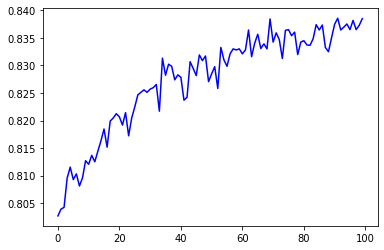

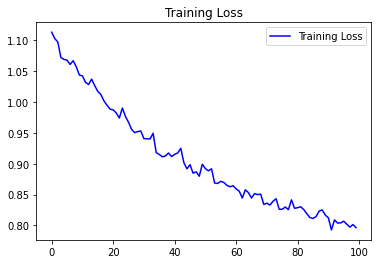

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training Accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.legend()

plt.show()

In [ ]:
seed_text = "Help me Obi WanKenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list],maxlen=max_sequence_len-1)
  predicted = model.predict_classes(token_list)
  output_word = ''
  
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += " "  + output_word

print(seed_text)

Help me Obi WanKenobi, you're my only hope wilt all a tomb of give white arising grow so long repair away doth eye go beauty's successive course bower dear eye doth dwell alone words away dead night away more indigest convertest back away forth dwell to dwell alone words doth purging more rage do ruining dead spent night new fire remain rare gone and still away so from doubt be gone to all me show thee thine thy tongue doth slain more rage hath shown place new twain twain twain place dead new days so brought to bear go ' back new twain away age away alone please
